In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import numpy as np
import json
import os
from IPython.core.display import display

In [ ]:
# Helpers for reading and serializing json files

def read_json(file_path):
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf8") as file:
            data = json.load(file)
        return data
    else:
        print(f"No data found at path: {file_path}")
        return {}

def serialize_json(filename, data):
    with open(filename, "w", encoding="utf8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

In [ ]:
# Data correction: there was a bug in the given framework causing timestamps in data_try_{n}.json to be wrong

# Retrieving worker data
workerInfoList = []
for workerDir in os.scandir('../Data/'):
    task_data = read_json(workerDir.path + "/task_data.json")
    data_try = read_json(workerDir.path + "/data_try_1.json")
    questionnaire = task_data['questionnaires'][0]['questions']
    reformatQuest = {}
    for question in questionnaire:
        reformatQuest[question['name']] = question['answers']
    device = task_data["worker"]['ngxDeviceDetectorProperties']["device"]
    if device == 'Unknown':
        device = task_data["worker"]['ngxDeviceDetectorProperties']["os"]
    workerInfo = {}
    for key, value in data_try['questionnaires_answers'][0].items():
        workerInfo[key] = reformatQuest[key][int(value)]
    workerInfo['device'] = device
    workerInfoList.append(workerInfo)

# Converting worker data to pandas dataframe
df = pd.DataFrame.from_dict(workerInfoList)
# display(df)

# Saving data as json file
df.to_json("dataframes/questionnaire.json")

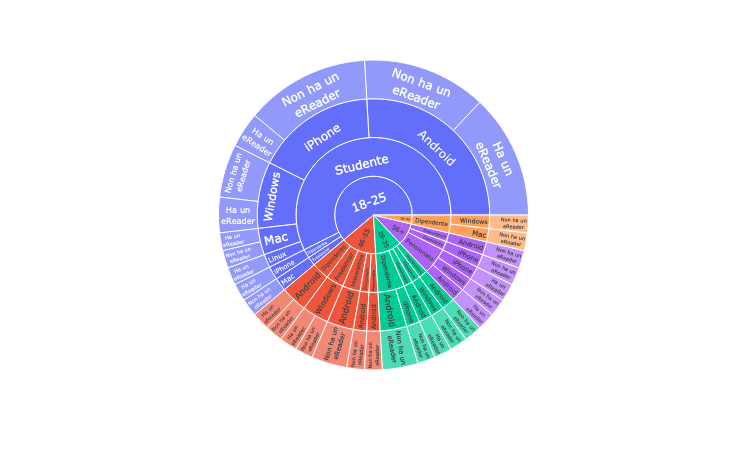

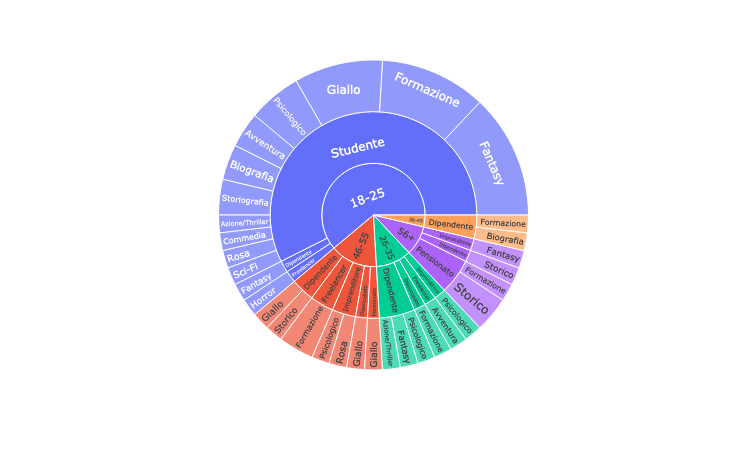

In [ ]:
# Sunburst plot that helps visualizing questionnaires datas 

sunburst_df = df.copy()
sunburst_df["kindle"] = sunburst_df["kindle"].apply({'Si': 'Ha un<br>eReader', 'No': 'Non ha un<br>eReader'}.get)
sunburst_device = px.sunburst(sunburst_df, path=['Età', 'Lavoro', 'device', 'kindle'])
sunburst_device.show()

# Saving 

force = False
if not os.path.isfile('./plot/sunburst_device.html') or force:
    sunburst_device.write_html('./plot/sunburst_device.html')
    sunburst_device.write_image('./plot/sunburst_device.png')
    
sunburst_genre = px.sunburst(sunburst_df, path=['Età', 'Lavoro', 'Genere letterario preferito'])
sunburst_genre.show()

force = False
if not os.path.isfile('./plot/sunburst_genre.html') or force:
    sunburst_genre.write_html('./plot/sunburst_genre.html')
    sunburst_genre.write_image('./plot/sunburst_genre.png')


In [ ]:
# Obtain a dataframe containing frequency for each questionaire option
def get_freq(df, column):
    out_df = df\
        .groupby(by=column)\
        .count()[['device']]\
        .reset_index()\
        .rename(columns={'device':'f'})\
        .sort_values(by=['f'], ascending=False)
    
    return out_df

# Convert frequencies to relative
def to_relative_freq(df, column='f'):
    total_amount = df['f'].sum()
    df['f'] = df['f'] / total_amount
    
    return df

# Saves a plot to disk
def save_plot(figure, name, force=False):
    if not os.path.isfile(f'./plot/{name}.html') or force:
        figure.write_html(f'./plot/{name}.html')
        figure.write_image(f'./plot/{name}.png')

<<<<<<< local


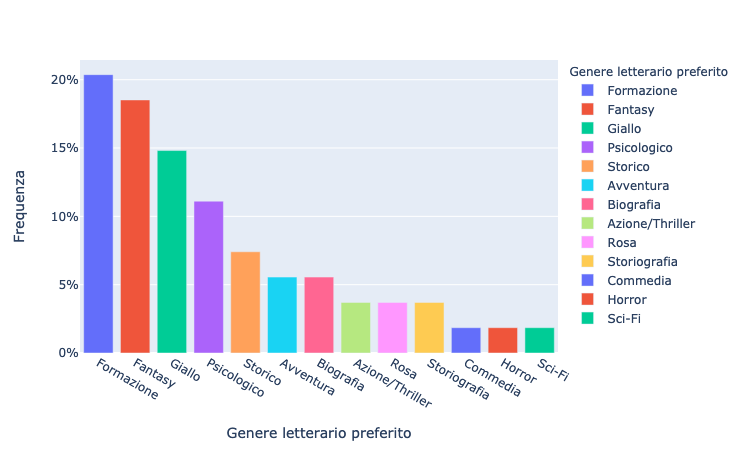

>>>>>>> remote


In [ ]:
df_genre = get_freq(df, 'Genere letterario preferito')
df_genre = to_relative_freq(df_genre)

# Plot everything
bar_genre = px.bar(df_genre, x = 'Genere letterario preferito', y = 'f', labels={'f': 'Frequenza'}, color='Genere letterario preferito')

# Add % sign to the ticks
bar_genre.update_layout(
    showlegend=False,
    yaxis_tickformat = '%'
)

bar_genre.show()

# Saving
save_plot(bar_genre, 'bar_genre')

<<<<<<< local


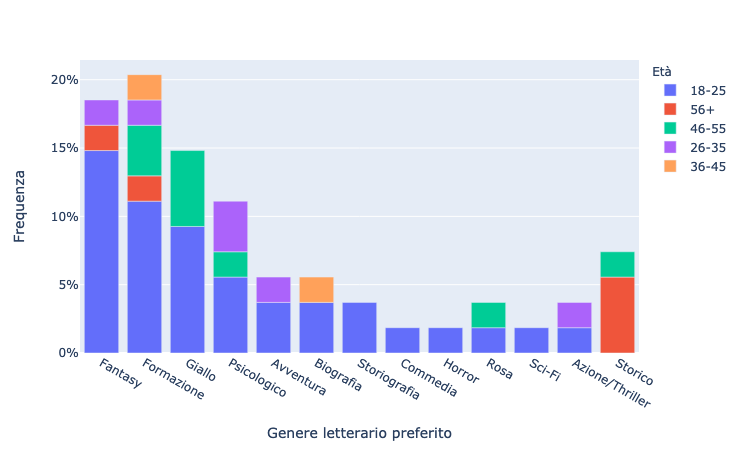

>>>>>>> remote


In [ ]:
# Plot based on genre and age
df_genre_age = get_freq(df, ['Genere letterario preferito', 'Età'])

# Relative freq
df_genre_age = to_relative_freq(df_genre_age)
bar_genre_age = px.bar(df_genre_age, x = 'Genere letterario preferito', labels = {'f': 'Frequenza'}, y = 'f', color='Età')

# Add % sign to the ticks
bar_genre_age.update_layout(yaxis_tickformat = '%')

bar_genre_age.show()

# Saving
save_plot(bar_genre_age, 'bar_genre_age')

<<<<<<< local


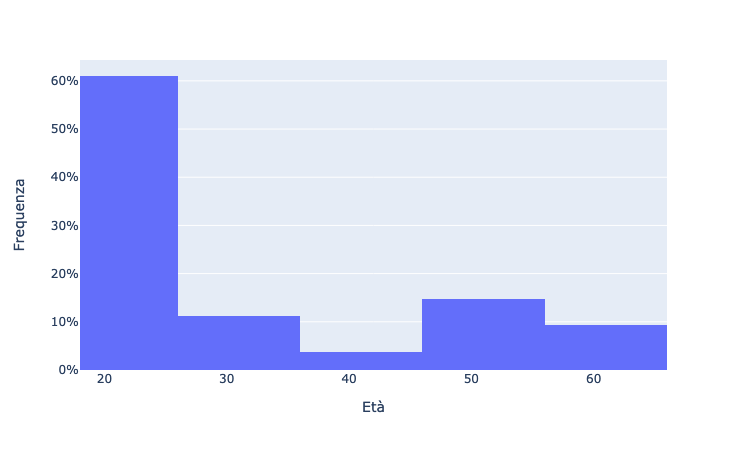

>>>>>>> remote


In [ ]:
# Create dataframe
df_age = df[['Età']]

# Normalize ages in order to build a histogram instead of a barplot 
age_normalized = []
for _, row in df_age.iterrows():
    key = row['Età']
    if key == '18-25':
        age_normalized.append(18)
    elif key == '26-35':
        age_normalized.append(26)
    elif key == '36-45':
        age_normalized.append(36)
    elif key == '46-55':
        age_normalized.append(46)
    else:
        age_normalized.append(56)

df_age_normalized = pd.DataFrame(age_normalized)

# Building histogram

# plt.hist(df_age_normalized, bins=[18,26,36,46,56,100], density=True)
hist_age = px.histogram(df_age_normalized, histnorm='probability', range_x=[18,66], labels={'value':'Età'})

hist_age.update_traces(
    xbins=dict( # bins used for histogram
        start=16,
        end=80,
        size=10
    )
)

hist_age.update_layout(
    showlegend=False,
    yaxis_title='Frequenza',
    yaxis_tickformat = '%'
)

hist_age.show()

# Saving
save_plot(hist_age, 'hist_age')

<<<<<<< local


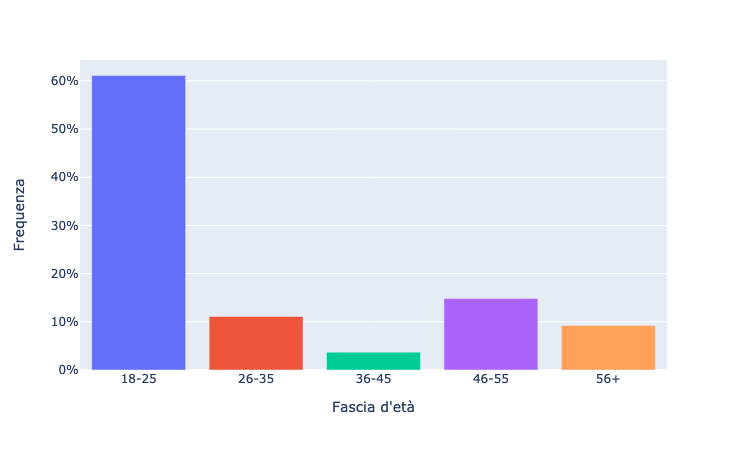

>>>>>>> remote


In [ ]:
# Barplot for ages instead of histogram, if needed at all
df_age2 = get_freq(df, "Età")
df_age2 = to_relative_freq(df_age2)

df_age2 = df_age2.reindex([0,1,2,3,4])

bar_age = px.bar(df_age2, x='Età', y='f', color='Età', labels={'Età': 'Fascia d\'età','f': 'Frequenza'})

bar_age.update_layout(
    showlegend=False,
    yaxis_tickformat = '%'
)

bar_age.show()
save_plot(bar_age, 'bar_age')

<<<<<<< local


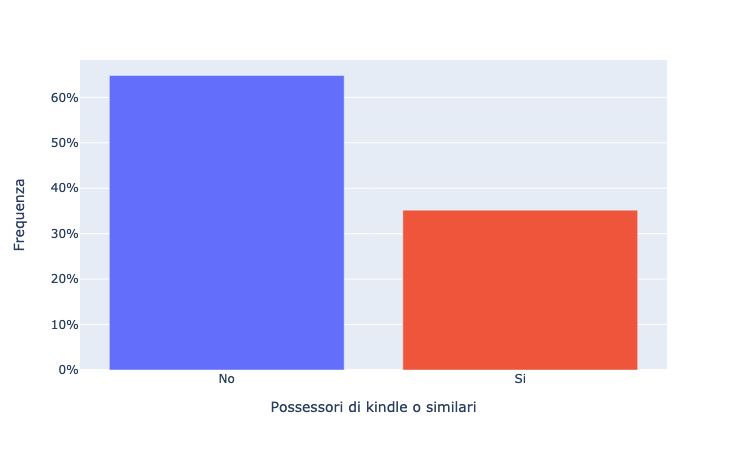

>>>>>>> remote


In [ ]:
# Kindle

df_kindle = get_freq(df, 'kindle')

# Relative freq
df_kindle = to_relative_freq(df_kindle)

bar_kindle = px.bar(df_kindle, x='kindle', y='f', color='kindle', labels={'kindle': 'Possessori di kindle o similari', 'f': 'Frequenza'})

bar_kindle.update_layout(
    showlegend=False,
    yaxis_tickformat = '%'
)

bar_kindle.show()

save_plot(bar_kindle, 'bar_kindle')

<<<<<<< local


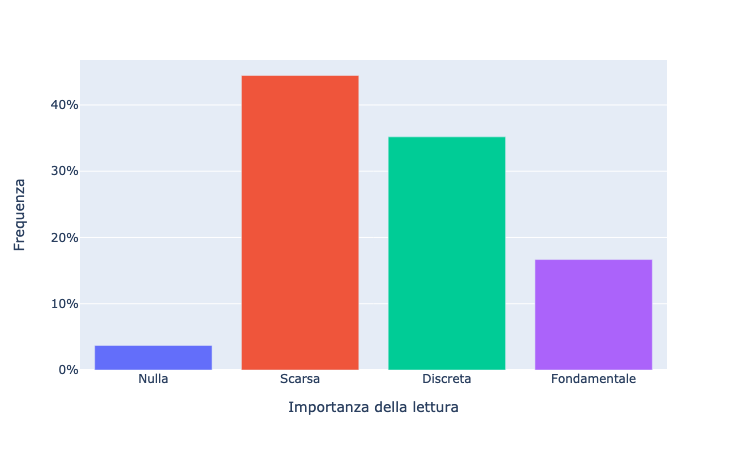

>>>>>>> remote


In [ ]:
# Importanza della lettura
df_reading = get_freq(df, 'Importanza')

# Sort based on Likert scale
df_reading = df_reading.reindex([2,3,0,1])

# Relative freq
df_reading = to_relative_freq(df_reading)

bar_reading = px.bar(df_reading, x='Importanza', y='f', color='Importanza', labels={'Importanza': 'Importanza della lettura', 'f': 'Frequenza'})

bar_reading.update_layout(
    showlegend=False,
    yaxis_tickformat = '%'
)

bar_reading.show()

save_plot(bar_reading, 'bar_reading')

<<<<<<< local


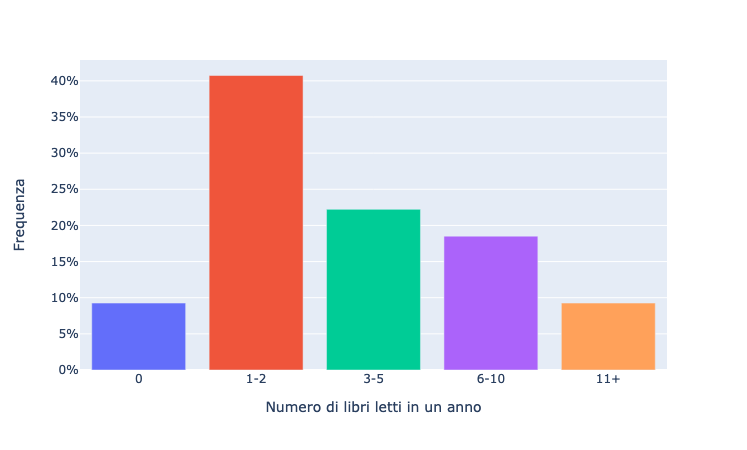

>>>>>>> remote


In [ ]:
# Number of books read per year
df_books_read = get_freq(df, 'Quanti libri')

# Sort based on Likert scale
df_books_read = df_books_read.reindex([0,1,3,4,2])

# Relative freq
df_books_read = to_relative_freq(df_books_read)

bar_books_read = px.bar(df_books_read, x='Quanti libri', y='f', color='Quanti libri', labels={'Quanti libri': 'Numero di libri letti in un anno', 'f': 'Frequenza'})

bar_books_read.update_layout(
    showlegend=False,
    yaxis_tickformat = '%'
)

bar_books_read.show()

save_plot(bar_books_read, 'bar_books_read')

In [ ]:
# Opinions retrieved from task

commentDict = {}
for workerDir in os.scandir('../Data/'):
    if os.path.isfile(f'{workerDir.path}/comment_try_1.json'):
        comment = read_json(f'{workerDir.path}/comment_try_1.json')
        if comment['comment'] != '':
            commentDict[workerDir.name] = comment['comment']
serialize_json('comment_summary.json', commentDict)

In [ ]:
# -- WORKER HITS DATA ANALYSIS --

worker_data = []
for worker_dir in os.scandir('../Data/'):
    data_try = read_json(worker_dir.path + "/data_try_1.json")
    task_data = read_json(worker_dir.path + "/task_data.json")
    worker_data.append((data_try, task_data))

# Get books info
df_all_books = pd.read_csv('../pyHITS/libri.csv', sep=';').reset_index()

# Building dataframe structure (each line is a worker)
dict_data = {
    'edizione_id': [],
    'hai_letto': [],
    'sfoglieresti': [],
    'compreresti': [],
    'prezzo_adeguato': [],
    'quanto_prezzo_adeguato': [],
    'impressione_valore': [],
    'impressione_testo': [],
    'time_elapsed': []
}

# Obtain index for a specific edition index given a book
def get_edition_index(current_book):
    for _, book in df_all_books.iterrows():
        if current_book['title'] == book['title'] and current_book['type']  == book['type'] and current_book['language'] == book['language']:
            return book['index']
    print('YoUsTOn we got a problem')

    
# Adding worker data as a row for every worker    
for entry in worker_data:
    data, task = entry

    for book in task['documents']:
        dict_data['edizione_id'].append(get_edition_index(book))
    
    for answers in data['documents_answers']:
        dict_data['hai_letto'].append(int(answers['Hai letto questo libro?_value']))
        dict_data['sfoglieresti'].append(int(answers['Sfoglieresti il libro vedendone la copertina?_value']))
        dict_data['compreresti'].append(int(answers['Compreresti questa edizione del libro? (eventualmente supponendo di non possederlo già)_value']))
        dict_data['prezzo_adeguato'].append(int(answers['Il prezzo è adeguato?_value']))
        dict_data['quanto_prezzo_adeguato'].append(int(answers['Indica quanto ti sembra adeguato:_value']))
        dict_data['impressione_valore'].append(int(answers['Quali sono le tue impressioni su questa edizione del libro?_value']))
        dict_data['impressione_testo'].append(answers['Quali sono le tue impressioni su questa edizione del libro?_justification'])

    for index, timestamp in enumerate(data['timestamps_elapsed']):
        if index != 0: # first timestamp is the questionnaire
            if type(timestamp) == list:
                dict_data['time_elapsed'].append(timestamp[-1])
            else:
                dict_data['time_elapsed'].append(timestamp)

# Building dataframe
df_data = pd.DataFrame(dict_data)
df_data.to_json("dataframes/worker_data.json")
df_data

,edizione_id,hai_letto,sfoglieresti,compreresti,prezzo_adeguato,quanto_prezzo_adeguato,impressione_valore,impressione_testo,time_elapsed
0,3,0,0,0,1,4,0,Non leggo libri di questo genere.\nNon acquist...,145.304
1,1,0,1,1,0,1,1,La storia la conosco. Il prezzo del libro è tr...,77.932
2,8,0,1,1,1,1,1,Sembra interessante.\nPrezzo troppo basso\nA a...,61.016
3,0,0,0,0,1,5,0,"E' un genere di lettura fantasy, azione, avven...",384.331
4,7,0,0,0,1,5,0,E' un genere di lettura che non rientra nei mi...,142.697
...,...,...,...,...,...,...,...,...,...
157,7,0,0,0,1,5,0,"La filosofia non mi piace, perciò non comprere...",225.679
158,2,0,0,0,1,4,0,"La copertina non è male, ma non mi piacciono l...",200.790
159,0,0,1,0,1,4,1,"Pur non essendo il mio genere preferito, resta...",237.434
160,4,0,0,0,0,2,0,Trovo il prezzo un po' elevato trattandosi di ...,215.457


In [ ]:
"""
 - Mean adequacy
 - Median adequacy
 - Max adequacy
 - Min adequacy
"""

# MEAN
mean_edition = df_data\
    .groupby('edizione_id')\
    .mean()

print("=============== MEAN ===============")
display(mean_edition)

# MEDIAN
median_edition = df_data\
    .groupby('edizione_id')\
    .median()

print("=============== MEDIAN ===============")
display(median_edition)

# MIN
min_edition = df_data\
    .drop(columns='impressione_testo')\
    .groupby('edizione_id')\
    .min()

print("=============== MIN ===============")
display(min_edition)

# MAX
max_edition = df_data\
    .drop(columns='impressione_testo')\
    .groupby('edizione_id')\
    .max()

print("=============== MAX ===============")
display(max_edition)

=============== MEAN ===============
=============== MEDIAN ===============
=============== MIN ===============
=============== MAX ===============


,hai_letto,sfoglieresti,compreresti,prezzo_adeguato,quanto_prezzo_adeguato,impressione_valore,time_elapsed
edizione_id,,,,,,,
0,0.333333,0.444444,0.277778,0.944444,3.944444,0.555556,203.004556
1,0.166667,0.555556,0.555556,0.777778,3.777778,0.611111,146.106556
2,0.055556,0.500000,0.277778,0.833333,3.222222,0.444444,188.815778
3,0.055556,0.555556,0.333333,0.833333,3.666667,0.666667,191.088056
4,0.388889,0.722222,0.666667,0.722222,3.444444,0.666667,180.487444
5,0.388889,0.833333,0.777778,0.833333,3.888889,0.666667,151.748222
6,0.277778,0.388889,0.388889,0.833333,3.666667,0.388889,262.673111
7,0.166667,0.277778,0.388889,0.722222,3.666667,0.444444,146.652056
8,0.166667,0.444444,0.333333,0.777778,3.611111,0.333333,153.097333


,hai_letto,sfoglieresti,compreresti,prezzo_adeguato,quanto_prezzo_adeguato,impressione_valore,time_elapsed
edizione_id,,,,,,,
0,0.0,0.0,0.0,1.0,4.0,1.0,166.0020
1,0.0,1.0,1.0,1.0,4.0,1.0,104.2735
2,0.0,0.5,0.0,1.0,3.0,0.0,153.4990
3,0.0,1.0,0.0,1.0,4.0,1.0,168.3815
4,0.0,1.0,1.0,1.0,4.0,1.0,165.0900
5,0.0,1.0,1.0,1.0,4.0,1.0,96.8370
6,0.0,0.0,0.0,1.0,3.5,0.0,200.3445
7,0.0,0.0,0.0,1.0,4.0,0.0,130.6425
8,0.0,0.0,0.0,1.0,3.5,0.0,130.2890


,hai_letto,sfoglieresti,compreresti,prezzo_adeguato,quanto_prezzo_adeguato,impressione_valore,time_elapsed
edizione_id,,,,,,,
0,0,0,0,0,3,0,98.098
1,0,0,0,0,1,0,70.523
2,0,0,0,0,1,0,54.608
3,0,0,0,0,1,0,72.597
4,0,0,0,0,1,0,43.847
5,0,0,0,0,2,0,38.223
6,0,0,0,0,0,0,81.875
7,0,0,0,0,0,0,39.165
8,0,0,0,0,0,0,40.698


,hai_letto,sfoglieresti,compreresti,prezzo_adeguato,quanto_prezzo_adeguato,impressione_valore,time_elapsed
edizione_id,,,,,,,
0,2,1,1,1,5,1,477.573
1,1,1,1,1,5,1,390.038
2,1,1,1,1,5,1,463.652
3,1,1,1,1,5,1,409.309
4,1,1,1,1,5,1,433.494
5,2,1,1,1,5,1,365.270
6,1,1,1,1,5,1,679.613
7,1,1,1,1,5,1,501.189
8,1,1,1,1,5,1,497.069


In [ ]:
"""
Calcolate le seguenti misure per ciascuna edizione:

    Grado medio di adeguatezza del prezzo
    Edizione con il livello massimo di adeguatezza del prezzo
    Edizione con il livello minimo di adeguatezza del prezzo
"""

# Grado medio di adeguatezza del prezzo
display(mean_edition[['prezzo_adeguato', 'quanto_prezzo_adeguato']], median_edition[['prezzo_adeguato', 'quanto_prezzo_adeguato']])

# Edizione con il livello massimo di adeguatezza del prezzo
display(max_edition[['prezzo_adeguato', 'quanto_prezzo_adeguato']])

# Edizione con il livello minimo di adeguatezza del prezzo
display(min_edition[['prezzo_adeguato', 'quanto_prezzo_adeguato']])

,prezzo_adeguato,quanto_prezzo_adeguato
edizione_id,,
0,0.944444,3.944444
1,0.777778,3.777778
2,0.833333,3.222222
3,0.833333,3.666667
4,0.722222,3.444444
5,0.833333,3.888889
6,0.833333,3.666667
7,0.722222,3.666667
8,0.777778,3.611111


,prezzo_adeguato,quanto_prezzo_adeguato
edizione_id,,
0,1.0,4.0
1,1.0,4.0
2,1.0,3.0
3,1.0,4.0
4,1.0,4.0
5,1.0,4.0
6,1.0,3.5
7,1.0,4.0
8,1.0,3.5


,prezzo_adeguato,quanto_prezzo_adeguato
edizione_id,,
0,1,5
1,1,5
2,1,5
3,1,5
4,1,5
5,1,5
6,1,5
7,1,5
8,1,5


,prezzo_adeguato,quanto_prezzo_adeguato
edizione_id,,
0,0,3
1,0,1
2,0,1
3,0,1
4,0,1
5,0,2
6,0,0
7,0,0
8,0,0


In [88]:
"""
Aggregate i dati calcolati al punto precedente e:

    Calcolate il grado medio di adeguatezza del prezzo
    Calcolate lo scarto quadratico medio (deviazione standard) del grado di adeguatezza del prezzo
    Determinate quale libro ha il grado più alto di adeguatezza del prezzo
"""
df_book_narnia = df_data[df_data['edizione_id'] < 3].reset_index(drop=True)

df_book_orient = df_data[df_data['edizione_id'] >= 3]
df_book_orient = df_book_orient[df_book_orient['edizione_id'] < 6].reset_index(drop=True)

df_book_zara = df_data[df_data['edizione_id'] >= 6].reset_index(drop=True)

df_book_list = [df_book_narnia, df_book_orient, df_book_zara]
df_book_agg = []
for book in df_book_list:
    df_book_agg.append(
        book\
        .drop(columns=['edizione_id', 'impressione_testo'])\
        .agg(["mean", "max", "min", "median", "std"])
    )
    display(df_book_agg[-1])

max_adequate = 0
book_index = 0
for index, book in enumerate(df_book_agg):
    if book['quanto_prezzo_adeguato']['mean'] > max_adequate:
        max_adequate = book['quanto_prezzo_adeguato']['mean']
        book_index = index
print("============ Adeguatezza ============")
print(f"Il libro con il grado medio più alto di adeguatezza del prezzo è {df_all_books['title'][3*book_index]} con un valore di {max_adequate}")

,hai_letto,sfoglieresti,compreresti,prezzo_adeguato,quanto_prezzo_adeguato,impressione_valore,time_elapsed
mean,0.185185,0.500000,0.370370,0.851852,3.648148,0.537037,179.308963
max,2.000000,1.000000,1.000000,1.000000,5.000000,1.000000,477.573000
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,54.608000
median,0.000000,0.500000,0.000000,1.000000,4.000000,1.000000,150.781000
std,0.437578,0.504695,0.487438,0.358583,1.066778,0.503308,108.594389


,hai_letto,sfoglieresti,compreresti,prezzo_adeguato,quanto_prezzo_adeguato,impressione_valore,time_elapsed
mean,0.277778,0.703704,0.592593,0.796296,3.666667,0.666667,174.441241
max,2.000000,1.000000,1.000000,1.000000,5.000000,1.000000,433.494000
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.223000
median,0.000000,1.000000,1.000000,1.000000,4.000000,1.000000,147.031000
std,0.529031,0.460911,0.495966,0.406533,1.243853,0.475831,102.005786


,hai_letto,sfoglieresti,compreresti,prezzo_adeguato,quanto_prezzo_adeguato,impressione_valore,time_elapsed
mean,0.203704,0.370370,0.370370,0.777778,3.648148,0.388889,187.474167
max,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,679.613000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.165000
median,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,145.906500
std,0.406533,0.487438,0.487438,0.419643,1.519153,0.492076,135.740067


============ Adeguatezza ============
Il libro con il grado medio più alto di adeguatezza del prezzo è Assassinio sull'Orient Express con un valore di 3.6666666666666665


In [ ]:
"""
    Mean length
    Longest explanation
    Shortest explanation
"""

# Show justifications and create a json of justifications
justification_dict = df_data['impressione_testo'].to_dict()
serialize_json("justifications.json", justification_dict)
  
# Splitting words and counting words
giustifications_len = df_data['impressione_testo']\
    .apply(lambda x: x.split(" "))\
    .apply(len)\
    .to_frame()

# Mean explanation length, then the longest and the shortest ones
print("====MEAN====")
print(f"The mean is {giustifications_len['impressione_testo'].mean()}")
print()

print("====MAX====")
print(f"Maximum length is {giustifications_len['impressione_testo'].max()}")
index_max = giustifications_len['impressione_testo'].idxmax()
print(f"\n\"{df_data['impressione_testo'][index_max]}\"")
print()

print("====MIN====")
print(f"Minum length is {giustifications_len['impressione_testo'].min()}")
index_min = giustifications_len['impressione_testo'].idxmin()
print(f"\n\"{df_data['impressione_testo'][index_min]}\"")

====MEAN====
The mean is 17.290123456790123

====MAX====
Maximum length is 70

"Viene spesso detto di non giudicare il libro dalla copertina ma la realtà secondo me è diversa, molto spesso in una libreria i libri che ci attirano si piú sono quelli con una copertina accattivante, elaborata e particolare.
La storia narrata è sicuramente di mio gradimento e su questo non ho nulla da dire.
Avendolo già letto lo consiglierei o acquisterei volentieri ma, per attrarre maggior clientela si dovrebbe migliorare la facciata."

====MIN====
Minum length is 11

"La storia la conosco. Il prezzo del libro è troppo basso"


In [ ]:
# Correlation between "Owning a kindle" and "Buying an eBook"


# DF structure
dict_kindle_quest = {
    'book_is_kindle': [],
    'has_kindle': [],
    'would_buy': []
}

# Helper function (returns 1 if book is kindle edition 0 otherwise)
def check_book_is_kindle_edition(current_book):
    return 1 if current_book['type'] == 'Kindle' else 0


# Adds data for each worker
for worker_dir in os.scandir('../Data/'):
    data_try = read_json(worker_dir.path + "/data_try_1.json")
    task_data = read_json(worker_dir.path + "/task_data.json")

    for book in task_data['documents']:
        dict_kindle_quest['book_is_kindle'].append(check_book_is_kindle_edition(book))

    for doc in data_try['documents_answers']:
        dict_kindle_quest['would_buy'].append(int(doc['Compreresti questa edizione del libro? (eventualmente supponendo di non possederlo già)_value']))
    
    has_kindle = int(data_try['questionnaires_answers'][0]['kindle'])
    for i in range(len(data_try['documents_answers'])): # always 3
        dict_kindle_quest['has_kindle'].append(has_kindle)

# Converts to dataframe
df_kindle_quest = pd.DataFrame(dict_kindle_quest)
display(df_kindle_quest)

,book_is_kindle,has_kindle,would_buy
0,0,1,0
1,1,1,1
2,0,1,1
3,0,1,0
4,1,1,0
...,...,...,...
157,1,0,0
158,0,0,0
159,0,1,0
160,1,1,0


In [ ]:
# CORRELATIONS

df_kindle_books = df_kindle_quest[df_kindle_quest['book_is_kindle']==1][['has_kindle','would_buy']]
corr = df_kindle_books.corr()['would_buy']['has_kindle']
print(f"Correlation with kindle books: {corr}")
print("Apparently there's a minimum negative correlation between buying a kindle book and having a kindle.")

print()

df_nonkindle_books = df_kindle_quest[df_kindle_quest['book_is_kindle']==0][['has_kindle','would_buy']]
corr = df_nonkindle_books.corr()['would_buy']['has_kindle']
print(f"Correlation with non-kindle books: {corr}")
print("There's a positive correlation, instead, between buying a non kindle book and owning a kindle.")

<<<<<<< local


Correlation with kindle books: -0.06192822461437944
Apparently there's a minimum negative correlation between buying a kindle book and having a kindle.

Correlation with non-kindle books: 0.16356980437845997
There's a positive correlation, instead, between buying a non kindle book and owning a kindle.


>>>>>>> remote


<<<<<<< local <modified: >


Correlation with kindle books: -0.061928224614379475
Correlation with non-kindle books: 0.16356980437846014


>>>>>>> remote <removed>


In [45]:
# Correlation between "I would buy this book" and "Language of the book is english"

# DF structure
dict_language_quest = {
    'book_is_english': [],
    'would_buy': []
}

# Helper function (returns 1 if book is kindle edition 0 otherwise)
def check_language(current_book):
    return 1 if current_book['language'] == 'Inglese' else 0


# Adds data for each worker
for worker_dir in os.scandir('../Data/'):
    data_try = read_json(worker_dir.path + "/data_try_1.json")
    task_data = read_json(worker_dir.path + "/task_data.json")

    for book in task_data['documents']:
        dict_language_quest['book_is_english'].append(check_language(book))

    for doc in data_try['documents_answers']:
        dict_language_quest['would_buy'].append(int(doc['Compreresti questa edizione del libro? (eventualmente supponendo di non possederlo già)_value']))
        
# Converts to dataframe
df_language_quest = pd.DataFrame(dict_language_quest)
corr = df_language_quest.corr()["would_buy"]["book_is_english"]
print(f"Correlation between \"Would buy\" and \"Book is english\" is {corr}")
print("\nSeems like there's a tiny correlation between the desire of buying a book and its language.")
print("Workers were all italian")

Correlation between "Would buy" and "Book is english" is 0.026352313834736577

Seems like there's a tiny correlation between the desire of buying a book and its language.
Workers were all italian


<<<<<<< local


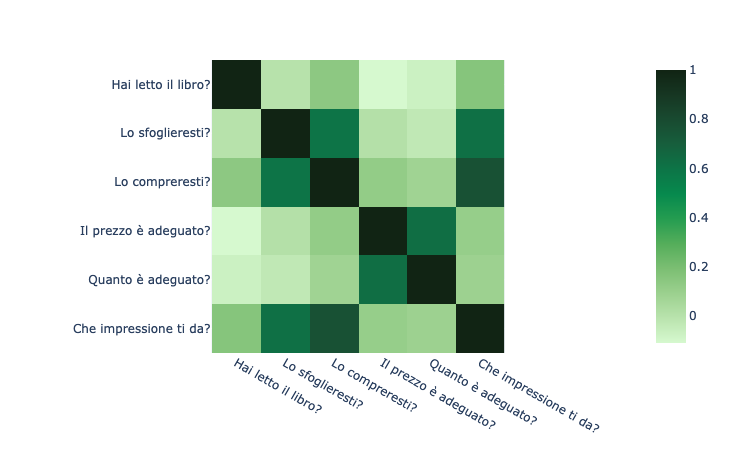

>>>>>>> remote


In [ ]:
# Correlation between HITS dimensions

correlation = df_data.drop(['edizione_id', 'time_elapsed'], axis=1).corr().apply(lambda x: round(x, 2))
labels = [
    'Hai letto il libro?', 
    'Lo sfoglieresti?',
    'Lo compreresti?',
    'Il prezzo è adeguato?',
    'Quanto è adeguato?',
    'Che impressione ti da?'
]

heatmap = px.imshow(correlation, x=labels, y=labels, color_continuous_scale=px.colors.sequential.algae)

heatmap.show()

save_plot(heatmap, 'heatmap')